In [1]:
import numpy as np, matplotlib, matplotlib.pyplot as plt
from matplotlib import animation
from itertools import combinations

plt.style.use(['science', 'notebook', 'grid', 'dark_background'])

The Maxwell-Boltzmann Distribution is used to determine how many gas molecules of equal masses $m$ are moving between velocities $v_1$ and $v_2$, given by $$f(v)=4\pi v^2\bigg(\frac{m}{2\pi k_BT}\Bigg)^{3/2}\exp\bigg(-\frac{mv^2}{2k_BT}\bigg)$$ It can be used to determine the distribution of the Kinetic Energy of for a set of molecules. The distribution of the Kinetic Energy is identical to the distribution of the speeds for a certain gas at any temperature.

In this demonstration, we'll use a random distribution of Billiard Balls coming from the left and right sides in a container, and whose velocities will eventually approach super close to that distribution. We'll consider $N=750$ particles, and get random positions (b/w 0 and 1) and give specific IDs to each of them.

In [2]:
N = 750
r = np.random.random((2, N))

r.shape

(2, 750)

In [3]:
ixr = r[0] > 0.5
ixl = r[0] <= 0.5

IDs = np.arange(N)
IDs

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

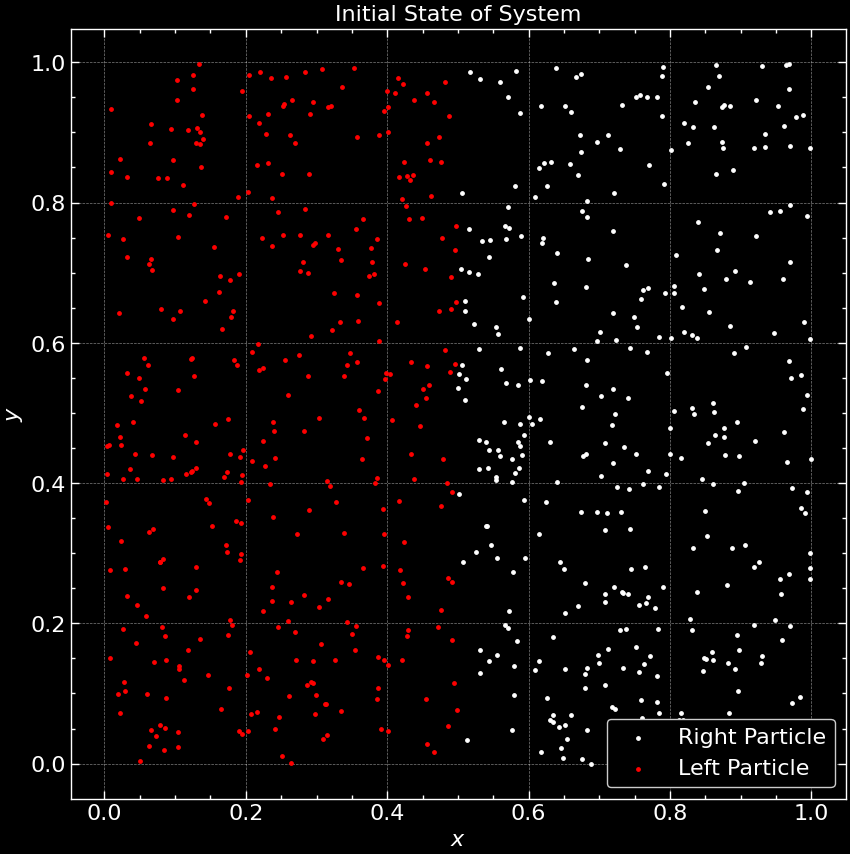

In [4]:
plt.figure(figsize = (10, 10))
plt.scatter(r[0][ixr], r[1][ixr], color = 'white', s = 6, label = 'Right Particle')
plt.scatter(r[0][ixl], r[1][ixl], color = 'red', s = 6, label = 'Left Particle')

plt.title('Initial State of System')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()

Initial Velocities (Assume that the container is at room temperature and air molecules move at 500 m/s):

In [5]:
v = np.zeros((2, N))

v[0][ixr] = -500
v[0][ixl] = 500

# Distance Between all Molecule Pairs:

If two particles collide, we need to find the distance between all of those pairs. If it's less than twice the particle radius, they'll collide. So for $N$ particles there are $N(N-1)/2$ (280,875 for $N=750$) combinations. For Python, we'll make pairs of IDs instead.

In [6]:
IDs_pairs = np.asarray(list(combinations(IDs, 2)))
IDs_pairs

array([[  0,   1],
       [  0,   2],
       [  0,   3],
       ...,
       [747, 748],
       [747, 749],
       [748, 749]])

Distances b/w particles and their differences to obtain $\delta x_{ij}$ for every pair of particles:

In [7]:
x_pairs = np.asarray(list(combinations(r[0], 2)))

dx_pairs = np.diff(x_pairs, axis = 1).ravel()
dx_pairs

array([-0.47533139, -0.26404239,  0.24133851, ..., -0.08600131,
        0.18191639,  0.2679177 ])

The Total Distance $d_{ij}$ is $\sqrt{\delta x_{ij}^2+\delta y_{ij}^2}$. Also, there'll be the same number of different values for this as there are combinations for $N$ particles. For $y$-distances:

In [8]:
y_pairs = np.asarray(list(combinations(r[1], 2)))
dy_pairs = np.diff(y_pairs, axis = 1).ravel()

d_pairs = np.sqrt(dx_pairs ** 2 + dy_pairs ** 2)
d_pairs

array([0.48463145, 0.36616615, 0.48760619, ..., 0.11669592, 0.603191  ,
       0.56393381])

# Velocities of a Particular Collision:

At each simulation iteration, we'll evaluate 'd_pairs' and if any of the distances is $<2r$ then a collision occurs. In an Elastic Collision, the New Velocies $$\vec v_1^{new}=\vec v_1-\frac{(\vec v_1-\vec v_2)\cdot(\vec r_1-\vec r_2)}{\|\vec r_1-\vec r_2\|^2}(\vec r_1-\vec r_2)$$ $$\vec v_2^{new}=\vec v_2-\frac{(\vec v_2-\vec v_1)\cdot(\vec r_2-\vec r_1)}{\|\vec r_2-\vec r_1\|^2}(\vec r_2-\vec r_1)$$

In [9]:
rad = 0.0028125
IDs_pairs_collide = IDs_pairs[d_pairs < 2 * rad]

IDs_pairs_collide

array([[  9, 358],
       [ 20, 617],
       [ 26, 444],
       [ 27, 461],
       [ 99, 538],
       [142, 385],
       [148, 286],
       [178, 339],
       [183, 287],
       [198, 251],
       [227, 465],
       [233, 571],
       [235, 616],
       [240, 382],
       [323, 378],
       [336, 592],
       [427, 705],
       [432, 662],
       [581, 715],
       [628, 707]])

In [10]:
v1 = v[:,IDs_pairs_collide[:,0]]
v2 = v[:,IDs_pairs_collide[:,1]]

r1 = r[:,IDs_pairs_collide[:,0]]
r2 = r[:,IDs_pairs_collide[:,1]]

In [11]:
v1_new = v1 - np.diag((v1 - v2).T@(r1 - r2)) / np.sum((r1 - r2) ** 2, axis = 0) * (r1 - r2)
v2_new = v2 - np.diag((v2 - v1).T@(r2 - r1)) / np.sum((r2 - r1) ** 2, axis = 0) * (r2 - r1)

# Simulation Execution:

In [12]:
def get_delta_pairs(x):
    return np.diff(np.asarray(list(combinations(x, 2))), axis = 1).ravel()

def get_deltad_pairs(r):
    return np.sqrt(get_delta_pairs(r[0]) ** 2 + get_delta_pairs(r[1]) ** 2)

def compute_new_v(v1, v2, r1, r2):
    v1new = v1 - np.diag((v1 - v2).T@(r1 - r2)) / np.sum((r1 - r2) ** 2, axis = 0) * (r1 - r2)
    v2new = v2 - np.diag((v2 - v1).T@(r2 - r1)) / np.sum((r2 - r1) ** 2, axis = 0) * (r2 - r1)
    return v1new, v2new

def motion(r, v, id_pairs, ts, dt, d_cutoff):
    rs = np.zeros((ts, r.shape[0], r.shape[1]))
    vs = np.zeros((ts, v.shape[0], v.shape[1]))

    rs[0] = r.copy()
    vs[0] = v.copy()

    for i in range(1, ts):
        ic = id_pairs[get_deltad_pairs(r) < d_cutoff]
        v[:,ic[:,0]], v[:,ic[:,1]] = compute_new_v(v[:,ic[:,0]], v[:,ic[:,1]], r[:,ic[:,0]], r[:,ic[:,1]])

        v[0, r[0] > 1] = -np.abs(v[0, r[0] > 1])
        v[0, r[0] < 0] = np.abs(v[0, r[0] < 0])
        v[1, r[1] > 1] = -np.abs(v[1, r[1] > 1])
        v[1, r[1] < 0] = np.abs(v[1, r[1] < 0])

        r = r + v * dt
        rs[i] = r.copy()
        vs[i] = v.copy()
    return rs, vs

rs, vs = motion(r, v, IDs_pairs, ts = 1000, dt = 0.000008, d_cutoff = 2 * rad)

KeyboardInterrupt: 

# Distribution of Velocities:

The Maxwell-Boltzmann Distribution in $\mathbb R^2$ is $$f(v)=\frac{mv}{k_BT}\exp\bigg(-\frac{mv^2}{2k_BT}\bigg)$$ and $\displaystyle k_BT=\frac 12m\langle v\rangle^2$. Hence, say $\displaystyle A=\frac{m}{k_BT}=\frac 2{\langle v \rangle^2}$ and substitute $\langle v\rangle=500$ m/s:

In [14]:
v = np.linspace(0, 2000, 1000)
A = 2 / 500 ** 2

f_v = A * v * np.exp(-A * v ** 2 / 2)

Let's plot the velocities with a Histogram providing a choice of Timestep.

Text(0, 0.5, 'Fraction of Particles')

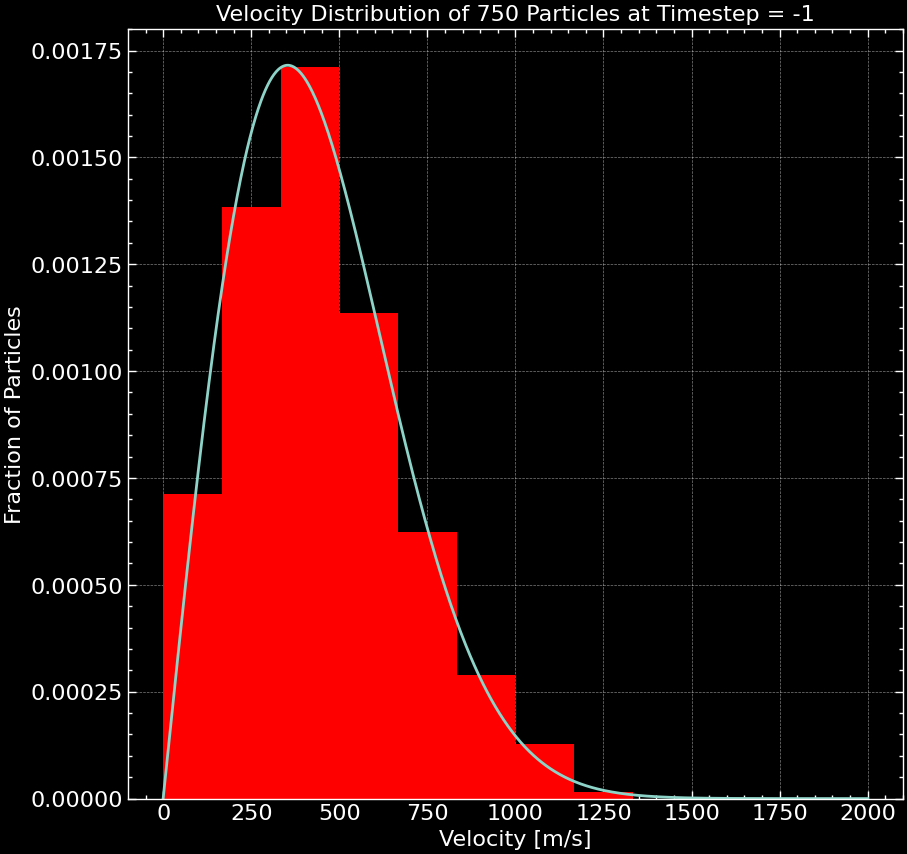

In [15]:
timestep = -1 # CHANGE THIS AS YOU PLEASE (0: Initial State, -1: Final State)

bins = np.linspace(0, 1500, 10)
plt.figure(figsize = (10, 10))

plt.hist(np.sqrt(np.sum(vs[timestep] ** 2, axis = 0)), bins = bins, density = True, color = 'red')
plt.plot(v, f_v)

plt.title('Velocity Distribution of {} Particles at Timestep = {}'.format(N, timestep))
plt.xlabel('Velocity [m/s]')
plt.ylabel('Fraction of Particles')

# Animation:

We can make an animation of both the Particles moving around and the Distribution of their Velocites:

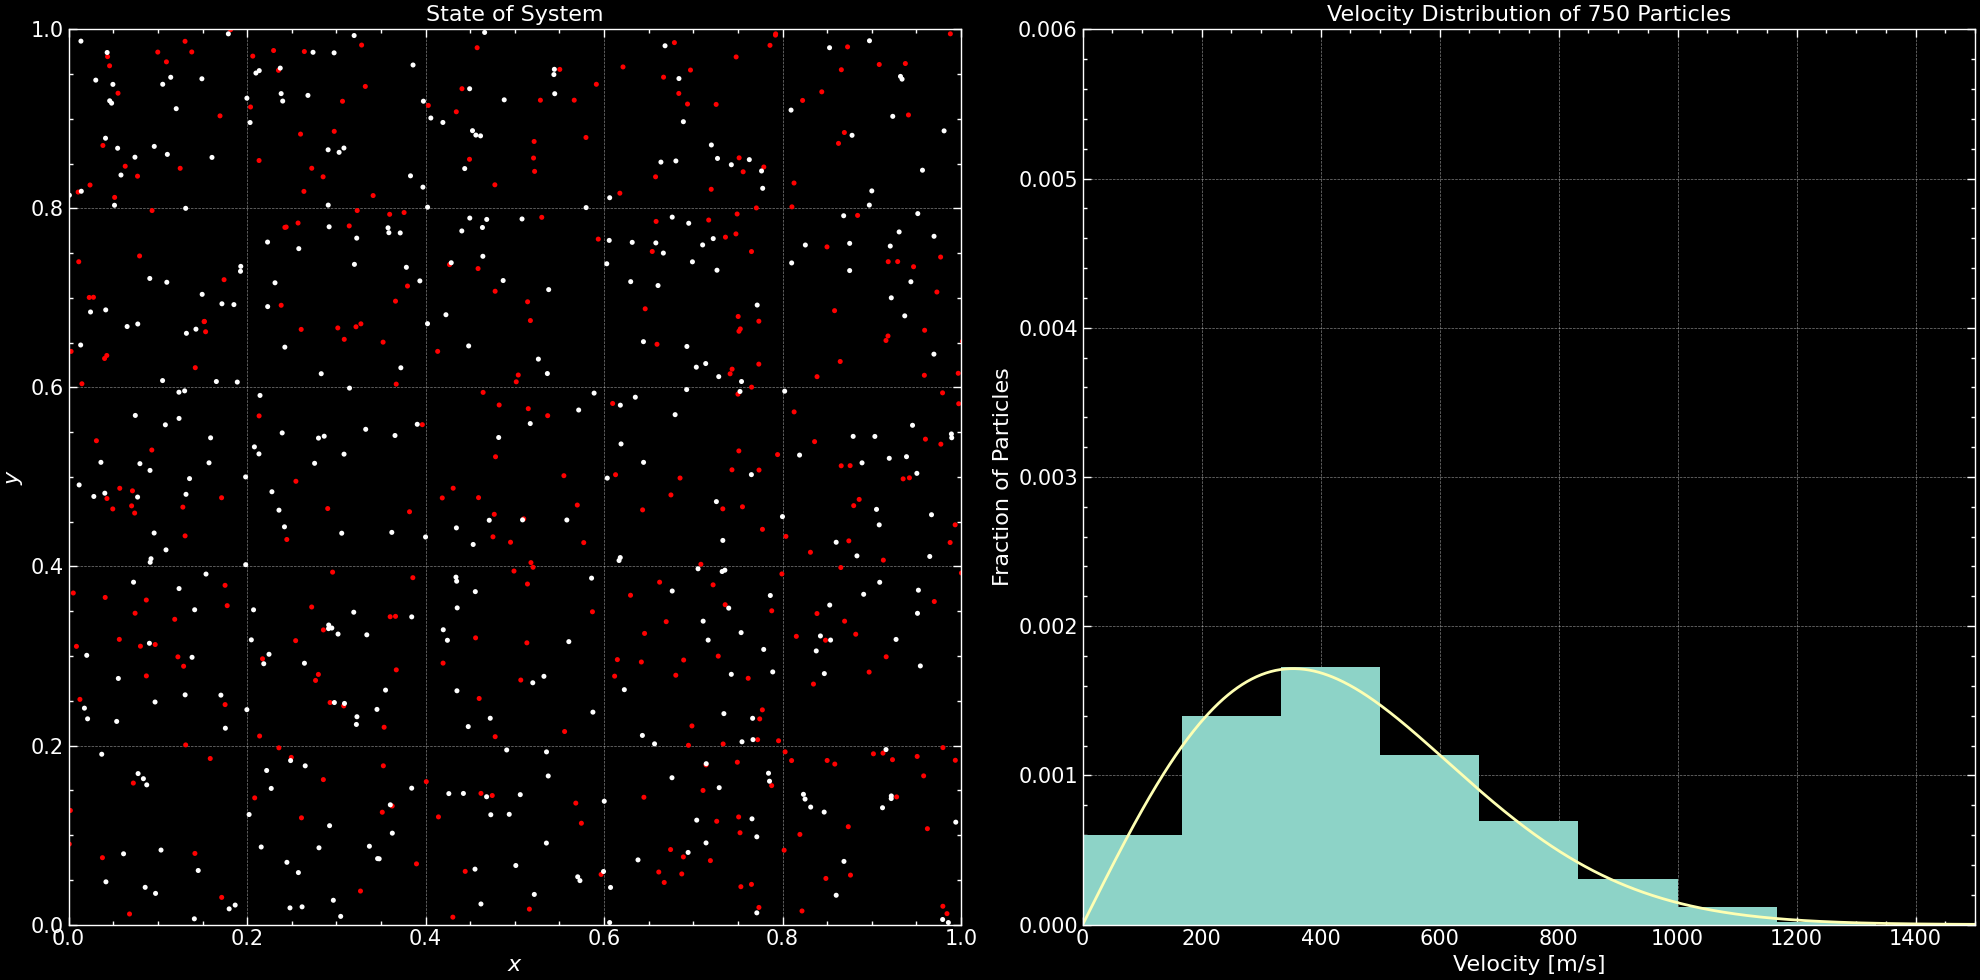

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (20,10))

def animate(i):
    [ax.clear() for ax in axes]
    ax = axes[0]

    x_red, y_red = rs[i][0][ixr], rs[i][1][ixr]
    x_white, y_white = rs[i][0][ixl],rs[i][1][ixl]
    
    circles_red = [plt.Circle((xi, yi), radius = rad, linewidth = 0) for xi, yi in zip(x_red, y_red)]
    circles_white = [plt.Circle((xi, yi), radius = rad, linewidth = 0) for xi, yi in zip(x_white, y_white)]
    
    cred = matplotlib.collections.PatchCollection(circles_red, facecolors = 'red')
    cblue = matplotlib.collections.PatchCollection(circles_white, facecolors = 'white')
    
    ax.add_collection(cred)
    ax.add_collection(cblue)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    ax.set_title('State of System')
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

    ax.tick_params(axis = 'x', labelsize = 15)
    ax.tick_params(axis = 'y', labelsize = 15)
    
    ax = axes[1]

    ax.hist(np.sqrt(np.sum(vs[i] ** 2, axis = 0)), bins = bins, density = True)
    ax.plot(v, f_v)

    ax.set_title('Velocity Distribution of {} Particles'.format(N))
    ax.set_xlabel('Velocity [m/s]')
    ax.set_ylabel('Fraction of Particles')
    
    ax.set_xlim(0, 1500)
    ax.set_ylim(0, 0.006)

    ax.tick_params(axis = 'x', labelsize = 15)
    ax.tick_params(axis = 'y', labelsize = 15)
    fig.tight_layout()
    
ani = animation.FuncAnimation(fig, animate, frames = 500, interval = 50)
ani.save(r'..\Outputs\boltzmann.dist_2d.gif', writer = 'pillow',fps = 30, dpi = 100)